<a href="https://colab.research.google.com/github/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura/blob/main/RosanaTrevisan_ProjetoFinalBootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO FINAL - BOOTCAMP DATA SCIENCE APLICADA ALURA**

# **MODELO PARA PREVISÃO DE UTILIZAÇÃO DE UTI PARA PACIENTES COM COVID-19**

Autora: **Rosana Trevisan Roque**


Linkedin: https://www.linkedin.com/in/rosana-trevisan-roque/


GitHub: https://github.com/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura

Perfil da autora: 

Bacharel em Química Industrial pela USP, com MBA em Marketing pela FGV e MBA em Big Data Aplicado ao Marketing pela ESPM. 

Com mais de 20 anos de experiência em multinacionais de bens de consumo e indústria química, sou especialista em Inteligência de Mercado, Gerenciamento de Projetos e Desenvolvimento de Produtos. 

Atualmente trabalho como Especialista de Vendas na Rhodia Brasil (Solvay Group).

# ***INTRODUÇÃO***

A pandemia de COVID-19 atingiu o mundo inteiro, sobrecarregando os sistemas de saúde - despreparados para uma solicitação tão intensa e demorada de leitos de UTI, profissionais, equipamentos de proteção individual e recursos de saúde.

Há urgência na obtenção de dados precisos para melhor prever e preparar os sistemas de saúde e evitar colapsos, definido pela necessidade de leitos de UTI acima da capacidade (assumindo que recursos humanos, EPIs e profissionais estejam disponíveis), usando dados clínicos individuais - em vez de dados epidemiológicos e populacionais.

A equipe de Data Science do hospital Sírio Libanês disponibilizou no [Kaggle](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19) informações de pacientes que passaram pelo hospital entre 28 de janeiro de 2020 e 16 de abril de 2020. Este conjunto de dados contém dados anônimos do Hospital Sírio-Libanês, de São Paulo e de Brasília. Todos os dados foram tornados anônimos seguindo as melhores práticas e recomendações internacionais. Os dados foram limpos e escalados por coluna de acordo com Min Max Scaler para caber entre -1 e 1.

Informações disponíveis na base de dados:
1. Informações demográficas do paciente (03 variáveis)
2. Doenças anteriores agrupadas de pacientes (09 variáveis)
3. Resultados de exames de sangue (36 variáveis)
4. Medidas de sinais vitais (06 variáveis)

Os dados foram agrupados de acordo com janelas de tempo, ou seja, número de horas após a chegada do paciente no hospital.

# ***OBJETIVO***

O objetivo deste projeto é o desenvolvimento de um modelo de Machine Learning para prever a admissão na UTI de casos confirmados de COVID-19.

# ***PREPARAÇÃO DAS BASES DE DADOS***

##*Importação das Bibliotecas*

In [ ]:
#Importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import requests
from io import BytesIO
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm, tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

##***Dicionário das variáveis - base Sírio Libanês***

**PATIENT_VISIT_IDENTIFIER**: número identificador de cada paciente

**1. Informações demográficas do paciente** (03 variáveis):

AGE_ABOVE65: Classifica se o paciente tinha mais de 65 anos (1) ou não (0)

AGE_PERCENTIL: Faixa etária dos pacientes, com divisão a cada 10 anos

GENDER: Classificação de gênero dos pacientes em 0 ou 1



**2. Doenças anteriores de pacientes** (agrupadas) (09 variáveis)

DISEASE GROUPING 1 a DISEASE GROUPING 6

HTN

IMMUNOCOMPROMISED

OTHER



**3. Exames de sangue** (36 variáveis): Para cada uma das diferentes medidas listadas abaixo, a base tem 6 tipos de agregação: mean (média), median (mediana), max (máximo), min (mínimo), diff (max - min) e relative diff (diff/median).

ALBUMIN, BE_ARTERIAL, BE_VENOUS, BIC_ARTERIAL, BIC_VENOUS, BILLIRUBIN, BLAST, CALCIUM, CREATININ, FFA, GGT, GLUCOSE, HEMATOCRITE, HEMOGLOBIN, INR, LACTATE, LEUKOCYTES, LINFOCITOS, NEUTROPHILES, P02_ARTERIAL, P02_VENOUS, PC02_ARTERIAL, PC02_VENOUS, PCR, PH_ARTERIAL, PH_VENOUS, PLATELETS, POTASSIUM, SAT02_ARTERIAL, SAT02_VENOUS, SODIUM, TGO, TGP, TTPA, UREA, DIMER.



**4. Sinais vitais** (06 variáveis): Para cada uma das diferentes medidas listadas abaixo, a base tem 6 tipos de agregação: mean (média), median (mediana), max (máximo), min (mínimo), diff (max - min) e relative diff (diff/median).

BLOODPRESSURE_DIASTOLIC, BLOODPRESSURE_SISTOLIC, HEART_RATE, RESPIRATORY_RATE, TEMPERATURE, OXYGEN_SATURATION.


##***Base de dados do Sirio Libanês***

Carregando a base de dados do Sírio Libanês através de um link no GitHub:

In [ ]:
dados = pd.read_excel('https://github.com/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura/blob/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true')
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

In [ ]:
dados.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,...,821.000000,821.000000,821.0,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,0.158333,0.809896,0.528527,0.528527,0.528527,0.528527,-1.0,-0.963433,-0.963433,-0.963433,-0.963433,-1.0,-0.931121,-0.931121,-0.931121,-0.931121,-1.0,-0.310924,-0.310924,-0.310924,-0.310924,-1.0,-0.311845,-0.311845,-0.311845,-0.311845,-1.0,-0.945928,-0.945928,-0.945928,...,-0.954177,-0.954177,-1.0,-0.093631,-0.332600,-0.264701,-0.438754,0.066893,0.743077,-0.097790,-0.338468,-0.268632,-0.435121,0.063798,0.748588,-0.040855,-0.207812,-0.264999,-0.483129,0.326823,0.817565,-0.235001,-0.399582,-0.282029,-0.316753,0.014964,0.818593,-0.752454,-0.728053,-0.754100,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,0.365148,0.392485,0.224100,0.224100,0.224100,0.224100,0.0,0.160870,0.160870,0.160870,0.160870,0.0,0.169509,0.169509,0.169509,0.169509,0.0,0.100256,0.100256,0.100256,0.100256,0.0,0.118812,0.118812,0.118812,0.118812,0.0,0.076610,0.076610,0.076610,...,0.123582,0.123582,0.0,0.252064,0.274102,0.246760,0.217113,0.242858,0.132635,0.257733,0.277952,0.252709,0.225554,0.249208,0.125994,0.281304,0.277802,0.272725,0.278239,0.216198,0.283453,0.271123,0.287580,0.296247,0.402675,0.276163,0.141316,0.364001,0.408677,0.366349,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000

Tentei fazer uma matriz de dados faltantes, porém como a base de dados tem 231 colunas, a visualização ficou muito ruim.

Interpretando o output de dados.describe:

1) Primeira coluna indica que o identificador vai de 0 a 384, então tem 385 pacientes nesta base de dados. Tem várias linhas para o mesmo paciente, por isso 1925 linhas.

2) Nas doenças agrupadas temos 1920 linhas, indicando que não há informações para 1 (ou mais pacientes).

3) As colunas com informações de exames de sangue e sinais vitais contém várias linhas sem informações (NaN).

##*Base de dados complementar: casos confirmados de COVID no estado de São Paulo*

O objetivo de carregar esta base de dados é ter uma referência do perfil dos pacientes (casos confirmados) no estado de São Paulo, para comparar com a base do Sirio Libanês.

Base de dados extraída do site do Governo de SP:

Fonte: https://github.com/seade-R/dados-covid-sp, arquivo: Casos e óbitos por doenças pré-existentes, sexo e idade. Fonte: SIVEP-Gripe.

In [ ]:
def unzip_url_file(url):
  r = requests.get(url, stream=True)
  z = zipfile.ZipFile(BytesIO(r.content))
  file = z.extractall()
  return file

url = "https://github.com/seade-R/dados-covid-sp/blob/master/data/casos_obitos_doencas_preexistentes.csv.zip?raw=true"

unzip_url_file(url)
df = "/content/casos_obitos_doencas_preexistentes.csv"

base_sp = pd.read_csv(df,sep=";",engine='python')
base_sp

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,Riolândia,3544202,20.0,MASCULINO,CONFIRMADO,2020-11-13,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,São Paulo,3550308,18.0,MASCULINO,CONFIRMADO,2021-01-20,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,São Paulo,3550308,36.0,MASCULINO,CONFIRMADO,2020-06-13,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,Mogi das Cruzes,3530607,36.0,MASCULINO,CONFIRMADO,2020-06-19,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,São Paulo,3550308,37.0,MASCULINO,CONFIRMADO,2020-08-04,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002635,Piracicaba,3538709,50.0,MASCULINO,CONFIRMADO,2020-08-16,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2002636,Monte Mor,3531803,65.0,FEMININO,CONFIRMADO,2020-08-17,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2002637,Elisiário,3514924,68.0,FEMININO,CONFIRMADO,2020-07-29,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2002638,São Roque,3550605,9.0,MASCULINO,CONFIRMADO,2020-12-30,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


# ***ANÁLISE EXPLORATÓRIA DOS DADOS***

Início da análise da base de dados do Sirio Libanês. 

Quando possível, será feita a comparação com a base de dados de casos confirmados do estado de São Paulo.

Com o objetivo de facilitar as análises exploratórias da base dados, incluirei uma nova coluna ("Age") no dataframe "dados" para tradução da coluna AGE_PERCENTIL em variável numérica de acordo com a faixa etária. Esta nova base de dados será chamada de "dados1".

In [ ]:
dados1 = dados.copy()

dict_AGE = {
    '10th': 10,
    '20th': 20,
    '30th': 30,
    '40th': 40,
    '50th': 50,
    '60th': 60,
    '70th': 70,
    '80th': 80,
    '90th': 90,
    'Above 90th':100
}

dados1['Age'] = dados1['AGE_PERCENTIL'].map(dict_AGE)
dados1.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,Age
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0,60
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0,60
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0,60
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0,60
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.2422

Com o objetivo de facilitar a visualização de gráficos nas análises exploratórias, incluirei uma nova coluna ("ICU admission") no dataframe "dados1" para tradução da coluna ICU, gerando uma nova base chamada de "dados2".

Se ICU = 0, "ICU admission" = No (paciente não foi para a UTI);

Se ICU = 1, "ICU admission" =  Yes (paciente foi para a UTI).

In [ ]:
dict_ICU = {
    1: 'Yes',
    0: 'No'
}

dados2 = dados1.copy()
dados2['ICU admission'] = dados2['ICU'].map(dict_ICU)
dados2.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,Age,ICU admission
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0,60,No
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0,60,No
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0,60,No
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0,60,No
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.8

Para fazer uma análise dos dados demográficos, vou trabalhar com um dataframe mais simplificado, utilizando somente 1 linha por paciente:

In [ ]:
pacientes_unicos = dados2.query("WINDOW=='ABOVE_12'")
pacientes_unicos

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,Age,ICU admission
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.339130,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1,60,Yes
9,1,1,90th,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-0.914439,-0.914439,-0.914439,-0.914439,-1.0,-0.916230,-0.916230,-0.916230,-0.916230,-1.0,-0.268293,-0.268293,-0.268293,-0.268293,-1.0,-0.268293,-0.268293,-0.268293,-0.268293,-1.0,-0.938950,-0.938950,...,-0.178122,0.212601,-0.141163,-0.380216,0.010915,0.841977,-0.185185,0.184615,-0.169811,-0.379310,0.000000,0.842105,-0.587629,-0.3250,-0.572650,-1.000000,0.010989,0.797980,0.555556,0.556757,0.298507,0.757576,0.710145,1.000000,0.513043,0.472393,0.114504,0.764706,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1,90,Yes
14,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.463415,-0.463415,-0.463415,-0.463415,-1.0,-0.938950,-0.938950,...,-0.181070,-0.551603,-0.280660,-0.543785,0.057292,0.797149,-0.160494,-0.538462,-0.273585,-0.517241,0.107143,0.789474,-0.298969,-0.4500,-0.487179,-0.642857,0.142857,0.878788,-0.247863,-0.351351,-0.149254,-0.454545,0.101449,0.947368,-0.547826,-0.435583,-0.419847,-0.705882,-0.500000,-0.898990,-0.612422,-0.343258,-0.576744,-0.695341,-0.505464,-0.900129,ABOVE_12,1,10,Yes
19,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.002798,-0.546256,-0.270189,-0.535593,0.033571,0.694035,0.086420,-0.538462,-0.301887,-0.517241,-0.035714,0.736842,-0.381443,-0.6250,-0.521368,-0.857143,0.120879,0.171717,0.145299,-0.286486,0.477612,-0.272727,0.623188,1.000000,-0.078261,-0

####Definição de Funções para análises exploratórias

In [ ]:
def grafico_countplot(dataframe, coluna, nome_coluna, eixoy, titulo):
  '''Função para fazer gráficos countplot'''
  plt.figure(figsize=(12,5))
  sns.set_theme(style="whitegrid")
  ax = sns.countplot(x=coluna, data=dataframe)
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 3,
    '{:1.0f}'.format((height)),
    ha='center', fontsize=10)
  plt.xlabel(nome_coluna, fontsize=12)
  plt.ylabel(eixoy, fontsize=12)
  plt.title(titulo, fontsize=18)
  plt.show()

  return ax

In [ ]:
def tabela_frequencia_cruzada(dataframe, nome_coluna_indice, nome_coluna_coluna, normalizar):
  #Função para construção de tabelas crosstab
  index1 = dataframe[nome_coluna_indice]
  columns1 = dataframe[nome_coluna_coluna]
  frequencia_cruzada = pd.crosstab(index = index1,
                                 columns= columns1, normalize = normalizar)*100
  frequencia_cruzada = frequencia_cruzada.round(1)
  return frequencia_cruzada

In [ ]:
def grafico_heatmap(nome_tabela_frequencia_cruzada, titulo):
  #Função para construção de gráficos tipo heatmap
  f, ax = plt.subplots(figsize=(9, 6))
  sns.heatmap(nome_tabela_frequencia_cruzada, linewidths=.5, ax=ax, cmap='coolwarm', annot=True)
  plt.title(titulo, fontsize=18)
  plt.show()

  return ax

In [ ]:
def grafico_violin_1 (dataframe, eixo_x, titulo, rotulo_x):
  #Função para gráficos tipo violinplot com somente uma variável
  plt.figure(figsize=(10,6))
  ax = sns.violinplot(x= eixo_x, inner="quartile", data = dataframe)
  plt.title(titulo, fontsize=14)
  plt.xlabel(rotulo_x)
  plt.show()

  return ax  

In [ ]:
def grafico_violin_2 (dataframe, eixo_x, eixo_y, titulo, rotulo_x, rotulo_y):
  #Função para gráficos tipo violinplot com duas variáveis
  plt.figure(figsize=(10,6))
  ax = sns.violinplot(x= eixo_x, y = eixo_y, inner="quartile", data = dataframe)
  plt.title(titulo, fontsize=14)
  plt.xlabel(rotulo_x)
  plt.ylabel(rotulo_y)
  plt.show()

  return ax 

In [ ]:
def grafico_violin_3 (dataframe, eixo_x, eixo_y, hue, titulo, rotulo_x, rotulo_y, rotulo_legenda):
  #Função para gráficos tipo violinplot com três variáveis
  plt.figure(figsize=(10,6))
  ax = sns.violinplot(x= eixo_x, y = eixo_y, hue = hue, inner="quartile", split=True, data = dataframe)
  plt.title(titulo, fontsize=14)
  plt.xlabel(rotulo_x)
  plt.ylabel(rotulo_y)
  plt.legend(title = rotulo_legenda)
  plt.show()

  return ax 

In [ ]:
def rotulo(plot, feature):
  #Função para colocar rótulo de dados nos gráficos de barras
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.0f}'.format((height)),
      ha='center', fontsize=10)    

##*ANÁLISE DAS VARIÁVEIS DEMOGRÁFICAS*

###*Número de pacientes que foram ou não para a UTI*

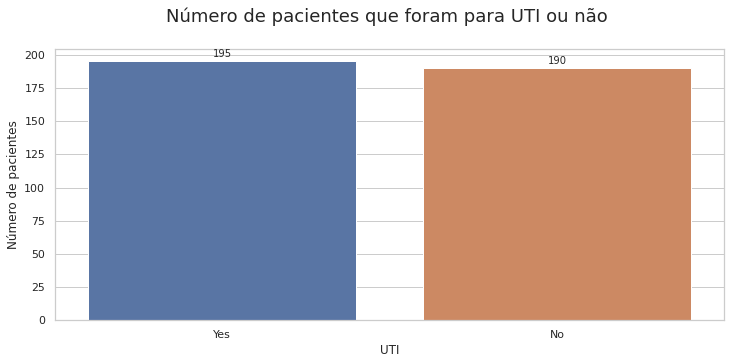

In [ ]:
pacientes_UTI = grafico_countplot(pacientes_unicos, 'ICU admission', 'UTI','Número de pacientes', 'Número de pacientes que foram para UTI ou não \n')
pacientes_UTI;

A amostra está bem dividida. Aproximadamente 50% dos pacientes foram para a UTI e 50% não foram. 

Base de dados filtrando somente os pacientes que foram para a UTI (1 linha por paciente):

In [ ]:
UTI_sim = pacientes_unicos.query("ICU == '1'")
UTI_sim

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,Age,ICU admission
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.339130,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1,60,Yes
9,1,1,90th,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-0.914439,-0.914439,-0.914439,-0.914439,-1.0,-0.916230,-0.916230,-0.916230,-0.916230,-1.0,-0.268293,-0.268293,-0.268293,-0.268293,-1.0,-0.268293,-0.268293,-0.268293,-0.268293,-1.0,-0.938950,-0.938950,...,-0.178122,0.212601,-0.141163,-0.380216,0.010915,0.841977,-0.185185,0.184615,-0.169811,-0.379310,0.000000,0.842105,-0.587629,-0.3250,-0.572650,-1.000000,0.010989,0.797980,0.555556,0.556757,0.298507,0.757576,0.710145,1.000000,0.513043,0.472393,0.114504,0.764706,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1,90,Yes
14,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.463415,-0.463415,-0.463415,-0.463415,-1.0,-0.938950,-0.938950,...,-0.181070,-0.551603,-0.280660,-0.543785,0.057292,0.797149,-0.160494,-0.538462,-0.273585,-0.517241,0.107143,0.789474,-0.298969,-0.4500,-0.487179,-0.642857,0.142857,0.878788,-0.247863,-0.351351,-0.149254,-0.454545,0.101449,0.947368,-0.547826,-0.435583,-0.419847,-0.705882,-0.500000,-0.898990,-0.612422,-0.343258,-0.576744,-0.695341,-0.505464,-0.900129,ABOVE_12,1,10,Yes
59,11,1,80th,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.217010,-0.348034,-0.435220,-0.507345,0.041270,0.645614,-0.160494,-0.384615,-0.433962,-0.517241,0.035714,0.631579,-0.278351,-0.4875,-0.538462,-0.642857,0.076923,0.797980,-0.247863,-0.351351,-0.328358,0.272727,0.217391,0.789474,-0.565217,-0.3

###*Número de pacientes por gênero*

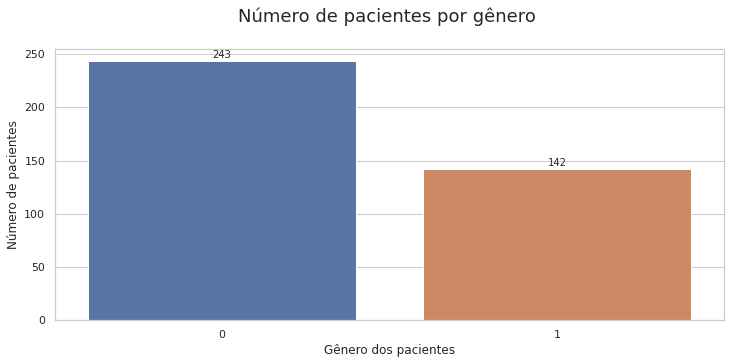

In [ ]:
pacientes_genero = grafico_countplot(pacientes_unicos, 'GENDER', 'Gênero dos pacientes','Número de pacientes', 'Número de pacientes por gênero \n')
pacientes_genero;

A base de dados do Sirio disponibilizada no Kaggle não tem identificação de qual é o sexo 0 e qual o sexo 1.

A maior parte (63%) dos pacientes é do gênero 0. 

Para comparação, vamos olhar a distribuição de gênero na base de dados de casos confirmados do estado de São Paulo:

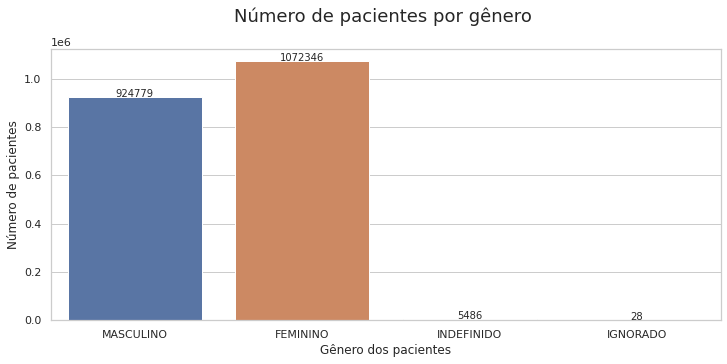

In [ ]:
pacientes_genero_sp = grafico_countplot(base_sp, 'cs_sexo', 'Gênero dos pacientes','Número de pacientes', 'Número de pacientes por gênero \n')
pacientes_genero_sp;

A base de dados de casos confirmados do estado de São Paulo, a maior parte é do sexo feminino (53%). Nesta base a distribuição é mais semelhante entre os dois sexos do que na base de dados do Sirio.

###*Gênero x internação na UTI*

In [ ]:
genero_ICU = tabela_frequencia_cruzada(pacientes_unicos, 'GENDER', 'ICU admission', 'index')
genero_ICU

ICU admission,No,Yes
GENDER,,
0,44.4,55.6
1,57.7,42.3


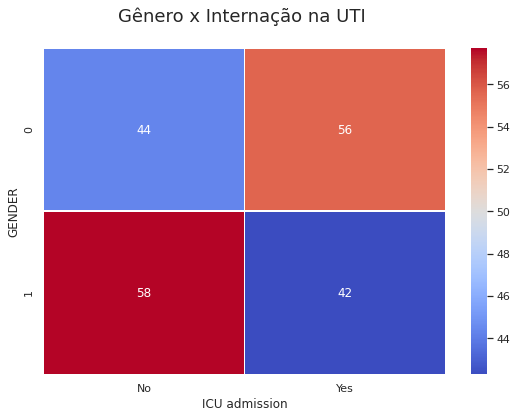

In [ ]:
grafico_genero_UTI = grafico_heatmap(genero_ICU, 'Gênero x Internação na UTI \n')
grafico_genero_UTI;

A maior parte (56%) dos pacientes do gênero 0 utilizou a UTI, enquanto que a maior parte (58%) dos pacientes do gênero 1 não utilizaram a UTI. Aparentemente o gênero é uma variável relevante para o modelo.

###*Pacientes acima de 65 anos*

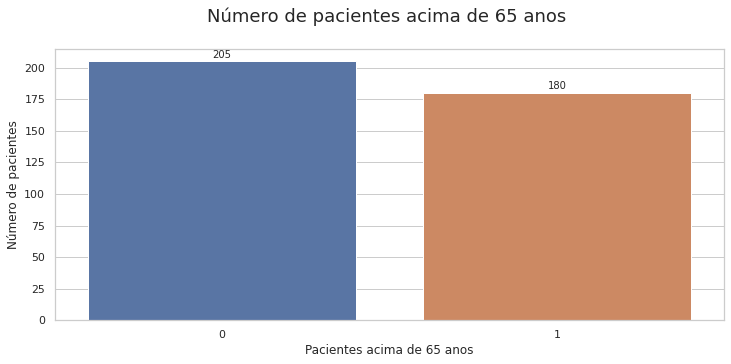

In [ ]:
pacientes_65 = grafico_countplot(pacientes_unicos, 'AGE_ABOVE65', 'Pacientes acima de 65 anos','Número de pacientes', 'Número de pacientes acima de 65 anos \n')
pacientes_65;

A maior parte dos pacientes (205) tinha idade abaixo de 65 anos e 180 com idade acima de 65 anos.

###*Distribuição de idade dos pacientes*

Análise da distribuição de idade dos pacientes da base de dados do Sirio:

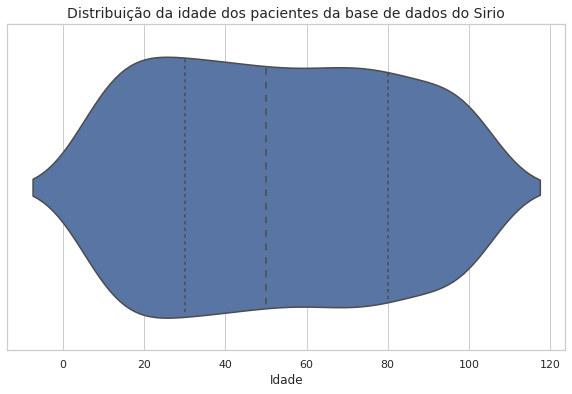

In [ ]:
idade_Sirio = grafico_violin_1(pacientes_unicos,"Age",'Distribuição da idade dos pacientes da base de dados do Sirio', 'Idade')
idade_Sirio;

Análise da distribuição de idade dos pacientes (casos confirmados) no estado de São Paulo:

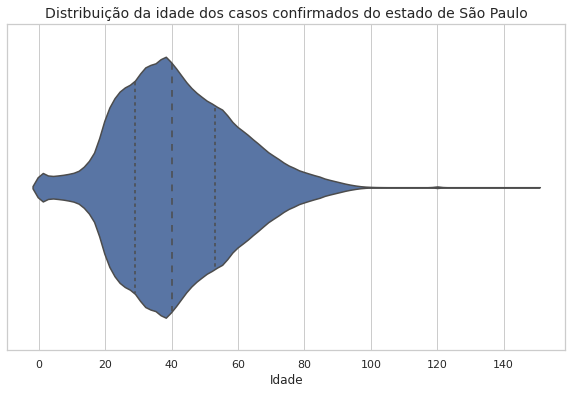

In [ ]:
idade_sp = grafico_violin_1(base_sp,"idade",'Distribuição da idade dos casos confirmados do estado de São Paulo', 'Idade')
idade_sp;

Comparando os dois gráficos de idade (Sírio x governo estado SP):

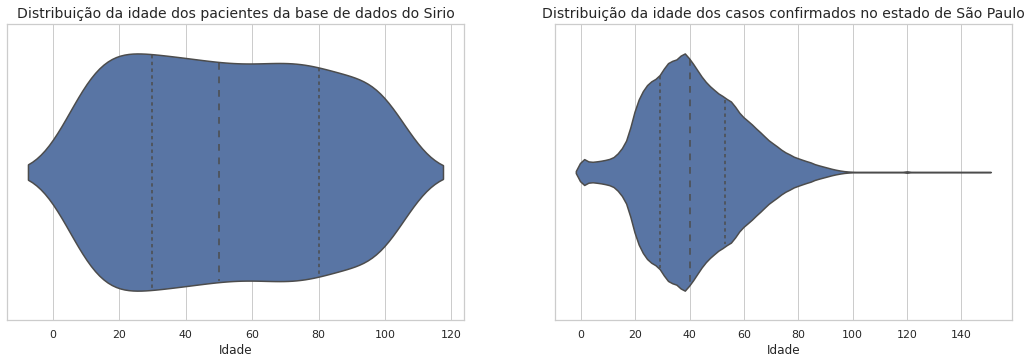

In [ ]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
ax = sns.violinplot(x="Age", inner="quartile", data = pacientes_unicos)
plt.title('Distribuição da idade dos pacientes da base de dados do Sirio', fontsize=14)
plt.xlabel('Idade')

plt.subplot(2,2,2)
ax = sns.violinplot(x="idade", inner="quartile", data = base_sp)
plt.title('Distribuição da idade dos casos confirmados no estado de São Paulo', fontsize=14)
plt.xlabel('Idade')

plt.show()

A distribuição de idade dos pacientes da base de dados do Sirio é mais ampla e com limite superior mais alto (80 anos) do que a base de dados de todos os casos confirmados no estado de São Paulo.

A mediana de idade dos pacientes do Sírio (50 anos) é maior do que da base de dados dos casos confirmados no estado de SP (40 anos).

###*Gênero x Idade dos pacientes*

Base de dados do Sírio:

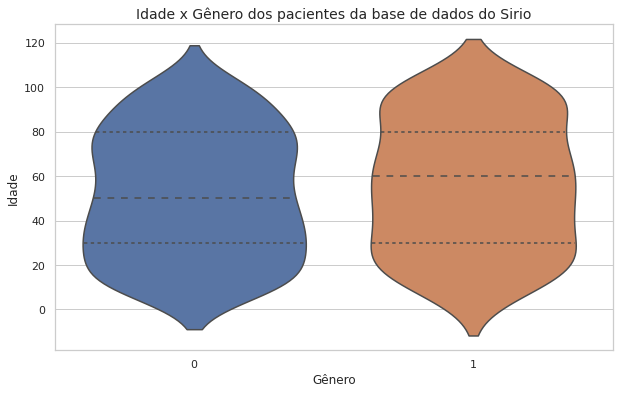

In [ ]:
idade_genero_Sirio = grafico_violin_2(pacientes_unicos, "GENDER","Age",'Idade x Gênero dos pacientes da base de dados do Sirio', 
                                      'Gênero', 'Idade')
idade_genero_Sirio;

A mediana de idade dos pacientes do gênero 1 é maior (60 anos) comparada aos pacientes do gênero 0 (50 anos).

Base de dados de casos confirmados no estado de São Paulo:

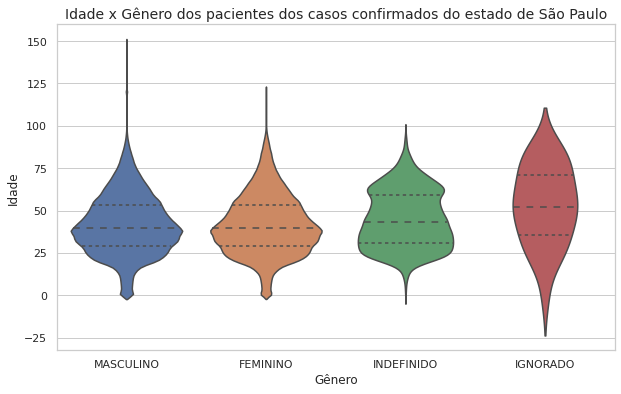

In [ ]:
idade_genero_sp = grafico_violin_2(base_sp, "cs_sexo","idade",'Idade x Gênero dos pacientes dos casos confirmados do estado de São Paulo',
                                   'Gênero', 'Idade')
idade_genero_sp;

A distribuição de idade é semelhante nos sexos feminino e masculino.

A mediana de idade é inferior a dos pacientes da base de dados do Sírio Libanês.

###*Idade x internação na UTI*

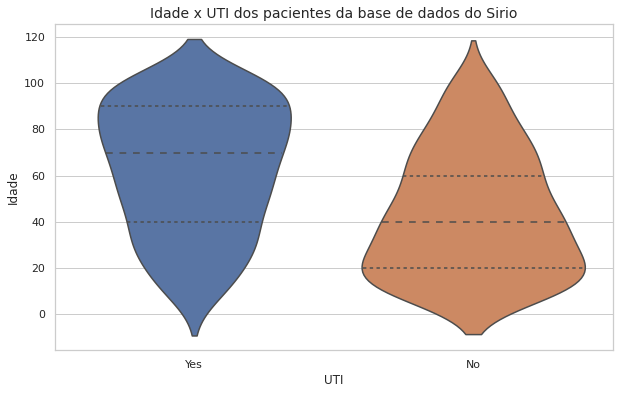

In [ ]:
idade_UTI_Sirio = grafico_violin_2(pacientes_unicos, "ICU admission","Age",'Idade x UTI dos pacientes da base de dados do Sirio', 'UTI', 'Idade')
idade_UTI_Sirio;

A mediana de idade dos pacientes que foram para a UTI (70 anos) é maior do que a dos pacientes que não foram (40 anos).

Na base de dados de casos de COVID no estado de SP, qual o perfil de idade dos pacientes que vieram a óbito?

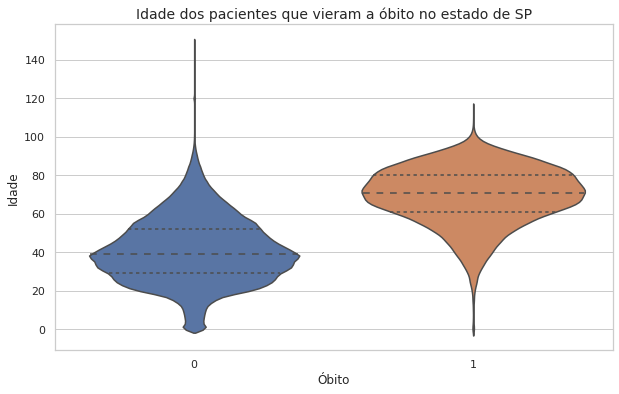

In [ ]:
obito_idade_genero_sp = grafico_violin_2(base_sp, "obito","idade",
                                         'Idade dos pacientes que vieram a óbito no estado de SP', 'Óbito', 'Idade')
obito_idade_genero_sp;

A mediana de idade (70 anos) dos pacientes que vieram a óbito por COVID no estado de SP (óbito = 1), é similar a idade dos pacientes que foram para a UTI na base do Sírio Libanês.

A mediana de idade (40 anos) dos pacientes que não morreram (óbito = 0) é similar a idade dos pacientes que não foram para a UTI na base de dados do Sírio Libanês.

###*Idade x gênero dos pacientes internados na UTI*

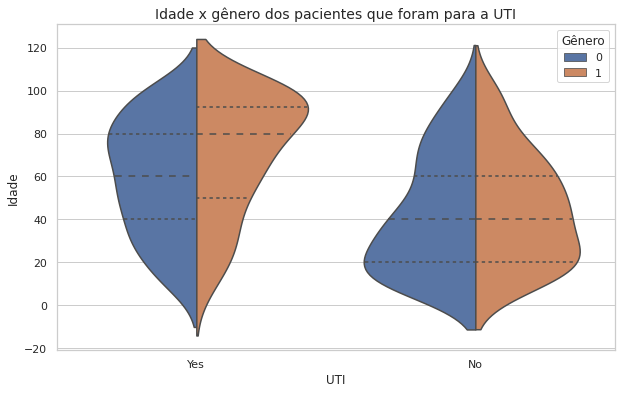

In [ ]:
idade_UTI_genero_Sirio = grafico_violin_3 (pacientes_unicos, "ICU admission", "Age", 'GENDER', 
                                           'Idade x gênero dos pacientes que foram para a UTI', 'UTI' , 'Idade', 'Gênero')
idade_UTI_genero_Sirio;

Para os pacientes que foram para a UTI, a mediana de idade do gênero 1 (80 anos) é maior que dos pacientes do gênero 0 (60 anos).
Para os pacientes que não foram para a UTI, a mediana de idade é a mesma para os 2 gêneros (40 anos).

##*ANÁLISE DAS DOENÇAS ANTERIORES*

Considerando apenas os pacientes foram para a UTI, qual o perfil de doenças anteriores?

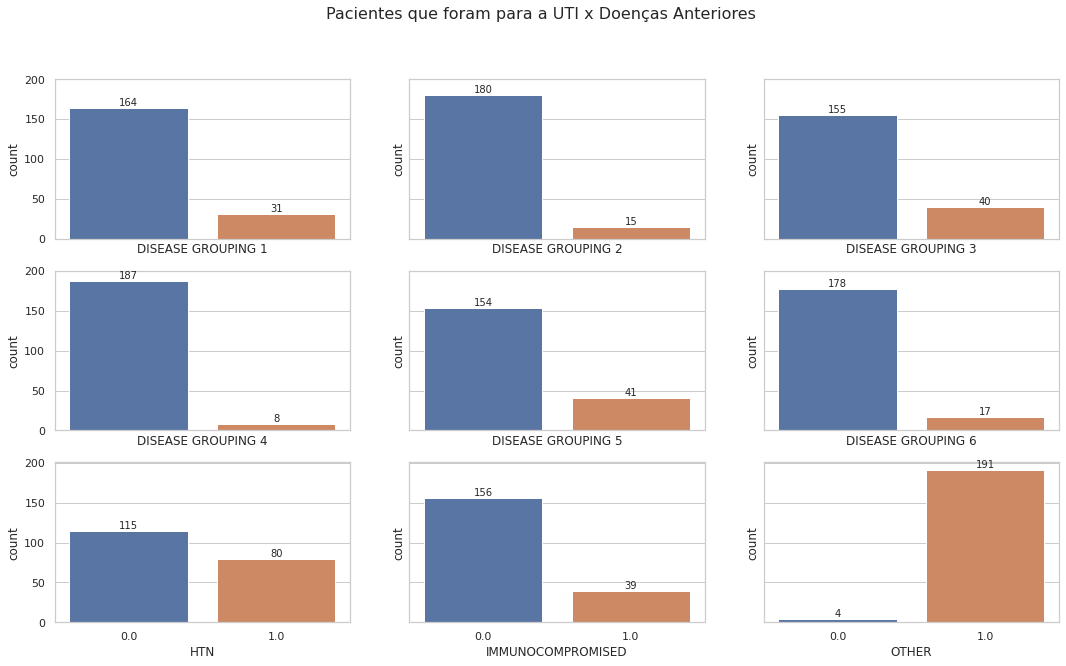

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10), sharex=True, sharey=True)

fig.suptitle('Pacientes que foram para a UTI x Doenças Anteriores', fontsize = 16)

ax = sns.countplot(ax=axes[0, 0], data=UTI_sim, x='DISEASE GROUPING 1')
rotulo(ax, 'DISEASE GROUPING 1')
    
ax = sns.countplot(ax=axes[0, 1], data=UTI_sim, x='DISEASE GROUPING 2')
rotulo(ax, 'DISEASE GROUPING 2')

ax = sns.countplot(ax=axes[0, 2], data=UTI_sim, x='DISEASE GROUPING 3')
rotulo(ax, 'DISEASE GROUPING 3')

ax = sns.countplot(ax=axes[1, 0], data=UTI_sim, x='DISEASE GROUPING 4')
rotulo(ax, 'DISEASE GROUPING 4')

ax = sns.countplot(ax=axes[1, 1], data=UTI_sim, x='DISEASE GROUPING 5')
rotulo(ax, 'DISEASE GROUPING 5')

ax = sns.countplot(ax=axes[1, 2], data=UTI_sim, x='DISEASE GROUPING 6')
rotulo(ax, 'DISEASE GROUPING 6')

ax = sns.countplot(ax=axes[2, 0], data=UTI_sim, x='HTN')
rotulo(ax, 'HTN')

ax = sns.countplot(ax=axes[2, 1], data=UTI_sim, x='IMMUNOCOMPROMISED')
rotulo(ax, 'IMMUNOCOMPROMISED')

ax = sns.countplot(ax=axes[2, 2], data=UTI_sim, x='OTHER')
rotulo(ax, 'OTHER')

plt.show()

Nos gráficos acima, 0 representa os pacientes que não tem a doença e 1 os pacientes que tem a doença.

98% dos pacientes que foram para a UTI tem algum tipo de doença classificado como OTHER.

Dos pacientes que foram para a UTI, a doença anterior mais frequente é a HTN (pressão alta).

Em seguida, 3 outros grupos de doenças aparecem em quantidade similar: Disease Group 5, Disease Group 3 e Immunocompomised.

##*ANÁLISE DOS RESULTADOS DOS EXAMES DE SANGUE*

A seguir farei uma análise para verificar se existe algum padrão diferente nos exames de sangue dos pacientes que foram para UTI em comparação aos pacientes que não foram para a UTI.

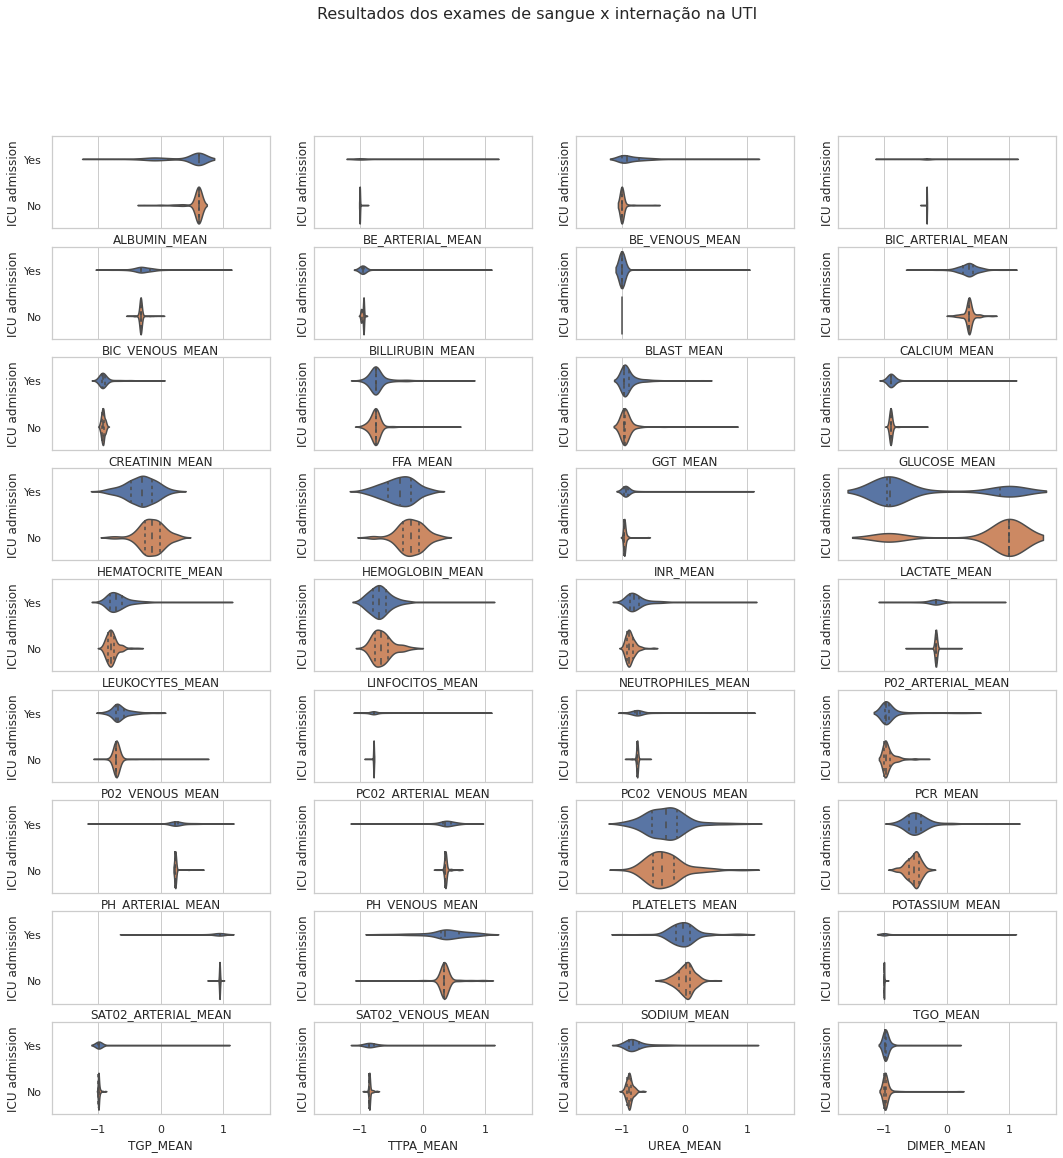

In [ ]:
fig, axes = plt.subplots(9, 4, figsize=(18, 18), sharex=True, sharey=True)

fig.suptitle('Resultados dos exames de sangue x internação na UTI', fontsize = 16)

ax = sns.violinplot(ax=axes[0, 0], data=pacientes_unicos, x='ALBUMIN_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[0, 1], data=pacientes_unicos, x='BE_ARTERIAL_MEAN', y='ICU admission',inner="quartile")   
ax = sns.violinplot(ax=axes[0, 2], data=pacientes_unicos, x='BE_VENOUS_MEAN', y='ICU admission',inner="quartile")   
ax = sns.violinplot(ax=axes[0, 3], data=pacientes_unicos, x='BIC_ARTERIAL_MEAN', y='ICU admission',inner="quartile") 

ax = sns.violinplot(ax=axes[1, 0], data=pacientes_unicos, x='BIC_VENOUS_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[1, 1], data=pacientes_unicos, x='BILLIRUBIN_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[1, 2], data=pacientes_unicos, x='BLAST_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[1, 3], data=pacientes_unicos, x='CALCIUM_MEAN', y='ICU admission',inner="quartile")

ax = sns.violinplot(ax=axes[2, 0], data=pacientes_unicos, x='CREATININ_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[2, 1], data=pacientes_unicos, x='FFA_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[2, 2], data=pacientes_unicos, x='GGT_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[2, 3], data=pacientes_unicos, x='GLUCOSE_MEAN', y='ICU admission',inner="quartile")

ax = sns.violinplot(ax=axes[3, 0], data=pacientes_unicos, x='HEMATOCRITE_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[3, 1], data=pacientes_unicos, x='HEMOGLOBIN_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[3, 2], data=pacientes_unicos, x='INR_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[3, 3], data=pacientes_unicos, x='LACTATE_MEAN', y='ICU admission',inner="quartile")

ax = sns.violinplot(ax=axes[4, 0], data=pacientes_unicos, x='LEUKOCYTES_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[4, 1], data=pacientes_unicos, x='LINFOCITOS_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[4, 2], data=pacientes_unicos, x='NEUTROPHILES_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[4, 3], data=pacientes_unicos, x='P02_ARTERIAL_MEAN', y='ICU admission',inner="quartile")

ax = sns.violinplot(ax=axes[5, 0], data=pacientes_unicos, x='P02_VENOUS_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[5, 1], data=pacientes_unicos, x='PC02_ARTERIAL_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[5, 2], data=pacientes_unicos, x='PC02_VENOUS_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[5, 3], data=pacientes_unicos, x='PCR_MEAN', y='ICU admission',inner="quartile")

ax = sns.violinplot(ax=axes[6, 0], data=pacientes_unicos, x='PH_ARTERIAL_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[6, 1], data=pacientes_unicos, x='PH_VENOUS_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[6, 2], data=pacientes_unicos, x='PLATELETS_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[6, 3], data=pacientes_unicos, x='POTASSIUM_MEAN', y='ICU admission',inner="quartile")

ax = sns.violinplot(ax=axes[7, 0], data=pacientes_unicos, x='SAT02_ARTERIAL_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[7, 1], data=pacientes_unicos, x='SAT02_VENOUS_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[7, 2], data=pacientes_unicos, x='SODIUM_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[7, 3], data=pacientes_unicos, x='TGO_MEAN', y='ICU admission',inner="quartile")

ax = sns.violinplot(ax=axes[8, 0], data=pacientes_unicos, x='TGP_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[8, 1], data=pacientes_unicos, x='TTPA_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[8, 2], data=pacientes_unicos, x='UREA_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[8, 3], data=pacientes_unicos, x='DIMER_MEAN', y='ICU admission',inner="quartile")

plt.show()

Analisando os resultados dos exames de sangue, o maior destaque é "LACTATE" porque a média dos resultados dos pacientes que foram internados na UTI (-1) é o oposto dos pacientes que não foram para a UTI (+1), indicando que provavelmente esta é uma variável de grande relevância para o modelo.

Outro ponto que chama a atenção é que, na maioria dos parâmetros medidos nos exames de sangue, os resultados dos pacientes que foram para a UTI apresentaram distribuição muito mais longa do que para os pacientes que não foram para a UTI. Exemplos: BILLIRUBIN, BE_ARTERIAL, TTPA, TGP, UREA, BIC_ARTERIAL entre outros.

##*ANÁLISE DOS SINAIS VITAIS*

A seguir farei uma análise para verificar se existe algum padrão diferente nos sinais vitais dos pacientes que foram para UTI comparado aos pacientes que não foram para a UTI.

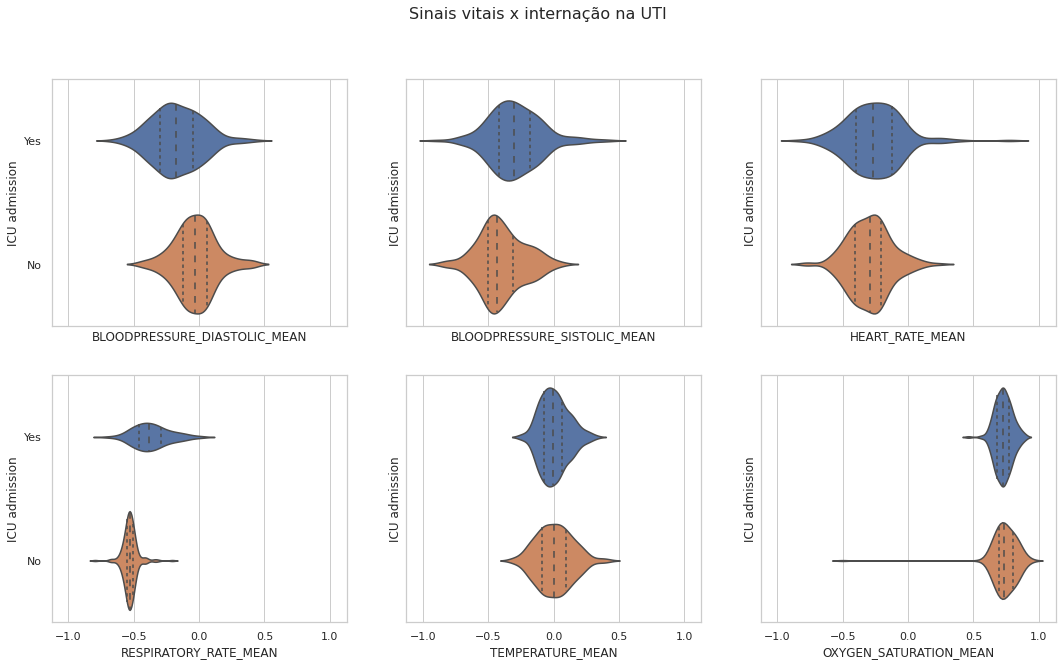

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

fig.suptitle('Sinais vitais x internação na UTI', fontsize = 16)

ax = sns.violinplot(ax=axes[0, 0], data=pacientes_unicos, x='BLOODPRESSURE_DIASTOLIC_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[0, 1], data=pacientes_unicos, x='BLOODPRESSURE_SISTOLIC_MEAN', y='ICU admission',inner="quartile")   
ax = sns.violinplot(ax=axes[0, 2], data=pacientes_unicos, x='HEART_RATE_MEAN', y='ICU admission',inner="quartile")   

ax = sns.violinplot(ax=axes[1, 0], data=pacientes_unicos, x='RESPIRATORY_RATE_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[1, 1], data=pacientes_unicos, x='TEMPERATURE_MEAN', y='ICU admission',inner="quartile")
ax = sns.violinplot(ax=axes[1, 2], data=pacientes_unicos, x='OXYGEN_SATURATION_MEAN', y='ICU admission',inner="quartile")


plt.show()

O parâmetro que mais chama a atenção é "RESPIRATORY_RATE", devido à distribuição mais alongada para pacientes que foram para a UTI, enquanto que os que não foram apresentaram medidas muito mais próximas da mediana.
Também há diferença nos 2 parâmetros relacionados a "BLOODPRESSURE".

# ***MACHINE LEARNING***

##Avaliando e limpando a base de dados antes da aplicação dos modelos de Machine Learning (parte 1)

Para que os modelos de Machine Learning tenham bom desempenho, farei algumas alterações na base de dados original (dataframe "dados").

Primeiramente utilizarei uma função para preencher os dados faltantes copiando os dados adjacentes do mesmo paciente, gerando uma nova base de dados, chamada de "dados_limpos":

In [ ]:
def preenche_tabela(dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True,axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

In [ ]:
dados_limpos = preenche_tabela(dados)
dados_limpos

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,-0.107143,0.736842,-0.283951,-0.376923,-0.188679,-0.379310,-0.107143,0.736842,-0.340206,-0.4875,-0.572650,-0.857143,0.318681,0.898990,-0.076923,0.286486,0.298507,0.272727,-0.275362,0.736842,-0.339130,0.325153,0.114504,0.176471,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,-0.107143,0.736842,-0.283951,-0.376923,-0.188679,-0.379310,-0.107143,0.736842,-0.340206,-0.4875,-0.572650,-0.857143,0.318681,0.898990,-0.076923,0.286486,0.298507,0.27

Além disso, por orientação do briefing da equipe do Sirio Libanês no Kaggle, é necessário excluir as linhas dos pacientes que foram imediatamente internados na UTI assim que chegaram no hospital (ICU = 1 e WINDOW = 0-2):

In [ ]:
a_remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query("PATIENT_VISIT_IDENTIFIER not in @a_remover")
dados_limpos = dados_limpos.dropna() #apagando linhas com valores faltantes
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1760.000000,1760.000000,1760.000000,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,...,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,192.818182,0.457386,0.380682,0.11250,0.026136,0.101705,0.021591,0.132955,0.049432,0.212500,0.163636,0.828977,0.517913,0.517913,0.517913,0.517913,-1.0,-0.958386,-0.958386,-0.958386,-0.958386,-1.0,-0.926916,-0.926916,-0.926916,-0.926916,-1.0,-0.306430,-0.306430,-0.306430,-0.306430,-1.0,-0.305377,-0.305377,-0.305377,-0.305377,-1.0,-0.945935,-0.945935,-0.945935,...,-0.955277,-0.955277,-1.0,-0.073908,-0.339631,-0.267838,-0.458545,0.067973,0.747996,-0.078023,-0.344698,-0.270867,-0.452606,0.064864,0.751914,-0.001207,-0.187010,-0.243988,-0.469278,0.350887,0.841908,-0.248728,-0.432592,-0.313034,-0.381784,-0.017968,0.808029,-0.799862,-0.785938,-0.804580,-0.778209,-0.823458,-0.915593,-0.828593,-0.774857,-0.854690,-0.788155,-0.824412,-0.915552,0.201705
std,110.637724,0.498322,0.485692,0.31607,0.159586,0.302345,0.145385,0.339622,0.216829,0.409193,0.370050,0.376636,0.235219,0.235219,0.235219,0.235219,0.0,0.182797,0.182797,0.182797,0.182797,0.0,0.178947,0.178947,0.178947,0.178947,0.0,0.107783,0.107783,0.107783,0.107783,0.0,0.120988,0.120988,0.120988,0.120988,0.0,0.088861,0.088861,0.088861,...,0.125227,0.125227,0.0,0.248552,0.261409,0.241648,0.207736,0.239760,0.119912,0.254493,0.264516,0.247132,0.218765,0.247949,0.119985,0.270201,0.261183,0.260190,0.252147,0.193029,0.236797,0.246389,0.258776,0.274449,0.356890,0.262440,0.132323,0.322680,0.356078,0.324716,0.411909,0.276279,0.247695,0.287696,0.368311,0.240338,0.384405,0.274953,0.248093,0.401387
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Confirmando que não há pacientes que foram internados na UTI nas duas primeiras horas na nova base de dados:

In [ ]:
dados_limpos.query('WINDOW=="0-2" and ICU==1')

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU


A base de dados a ser estudada irá considerar apenas uma linha para cada paciente. A linha escolhida será da primeira janela (WINDOW = 0-2) porque o objetivo é prever o mais cedo possível se o paciente será internado na UTI ou não.

Como alguns modelos de Machine Learning não trabalham com variáveis categóricas, será necessário transformar as informações da coluna "AGE_PERCENTIL" em numéricas. Porém não posso utilizar a tradução direta para faixas etárias (10, 20, 30, etc) como fiz na análise exploratória porque os dados das demais colunas estão normalizados (entre -1 e +1). Sendo assim, a tradução desta coluna será feita para números de 1 a 10:

In [ ]:
def prepare_window(rows):
    if(np.any(rows["ICU"])):
        rows.loc[rows["WINDOW"]=="0-2", "ICU"] = 1
    return rows.loc[rows["WINDOW"] == "0-2"]

dados_limpos = dados_limpos.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window).set_index('PATIENT_VISIT_IDENTIFIER').reset_index()
dados_limpos.AGE_PERCENTIL = dados_limpos.AGE_PERCENTIL.astype("category").cat.codes 
dados_limpos

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
1,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
2,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
3,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.935113,-0.935113,...,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-1.

In [ ]:
dados_limpos = dados_limpos.drop('WINDOW', axis=1)
dados_limpos.set_index('PATIENT_VISIT_IDENTIFIER', inplace=True)
dados_limpos

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.994912,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.978029,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1
3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,-0.972789,...,-0.978029,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.935113,-0.935113,-0.935113,...,-1.000000,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000

##Rodando modelos de Machine Learning (parte 1)


Definição de função para rodar modelos de Machine Learning com Cross Validate:

In [ ]:
def roda_modelo_cv_confusionmatrix(modelo, dados, n_splits, n_repeats):

    np.random.seed(1231234) 
    dados = dados.sample(frac=1).reset_index(drop=True) 
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU"], axis=1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats)

    resultados=cross_validate(modelo, x_train, y_train, cv=cv, scoring='roc_auc', return_train_score=True, return_estimator=True)
    
    modelos_confusion_matrix = []
    for cv_modelo in resultados['estimator']:
      y_pred = cv_modelo.predict(x_test)
      modelos_confusion_matrix.append(confusion_matrix(y_test, y_pred))

    mean_confusion_matrix = np.mean(modelos_confusion_matrix, axis=0)
    ax = sns.heatmap(np.around(mean_confusion_matrix), annot=True, cmap='coolwarm')
    ax.set_title('Confusion Matrix')
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax;

    auc_medio = np.mean(resultados['test_score'])
    auc_medio_treino = np.mean(resultados['train_score'])

    auc_std = np.std(resultados['test_score'])
    
    print(f'AUC médio teste {auc_medio} - AUC médio treino {auc_medio_treino}')
    return auc_medio, auc_medio_treino 

Definição de função para rodar modelos de Machine Learning com Cross Validate e GridSearchCV:

In [ ]:
def roda_modelo_GridSearchCV_confusionmatrix(modelo, dados, n_splits, n_repeats, espaco_de_parametros):

    np.random.seed(1231234)
    dados = dados.sample(frac=1).reset_index(drop=True)
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU"], axis=1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats)

    busca = GridSearchCV(modelo, param_grid=espaco_de_parametros,
                         cv = cv, scoring='roc_auc',
                         return_train_score=True)
    busca.fit(x_train, y_train)

    resultados = pd.DataFrame(busca.cv_results_)

    cv_modelo = busca.best_estimator_
    y_pred = cv_modelo.predict(x_test)
    best_confusion_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(np.around(best_confusion_matrix), annot=True, cmap='coolwarm')
    ax.set_title('Confusion Matrix')
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax; 

    auc_medio = resultados.iloc[busca.best_index_]['mean_test_score']
    auc_medio_treino = resultados.iloc[busca.best_index_]['mean_train_score']

    auc_std = resultados.iloc[busca.best_index_]['std_test_score']

    print(f'AUC  {auc_medio} - {auc_medio_treino}')
    return auc_medio, auc_medio_treino

###Logistic Regression

AUC médio teste 0.7214095648604268 - AUC médio treino 0.85624914414361


(0.7214095648604268, 0.85624914414361)

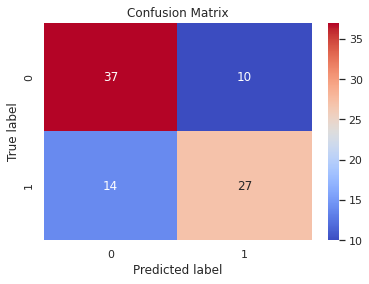

In [ ]:
LogReg = LogisticRegression(max_iter=10000)
roda_modelo_cv_confusionmatrix(LogReg, dados_limpos, 5, 10)

###Decision Tree

In [ ]:
param_grid_DT = {
  "max_depth" : range(2, 5),
  "min_samples_split" : [2, 4, 6],
  "max_features": ['auto', 'sqrt', 'log2'],
  "criterion" : ["gini", "entropy"]
  }

AUC  0.6344149835796388 - 0.8311984948882821


(0.6344149835796388, 0.8311984948882821)

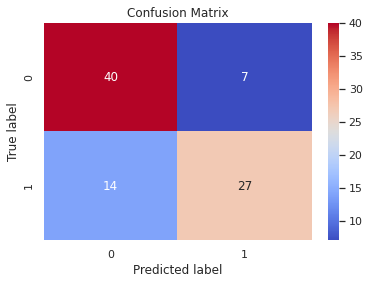

In [ ]:
DT = DecisionTreeClassifier()
roda_modelo_GridSearchCV_confusionmatrix(DT, dados_limpos, 5, 10, param_grid_DT)

###Random Forest

In [ ]:
param_grid_RF = {
    "n_estimators" : [10, 100, 1000],
    "max_features" : ['sqrt', 'log2']
    }  

AUC  0.774115619868637 - 1.0


(0.774115619868637, 1.0)

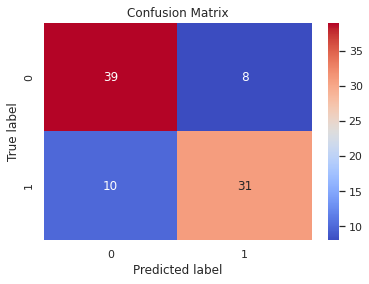

In [ ]:
RFC = RandomForestClassifier()
roda_modelo_GridSearchCV_confusionmatrix(RFC, dados_limpos, 5, 10, param_grid_RF)

###Naive Bayes

AUC médio teste 0.6882864532019706 - AUC médio treino 0.7810651390620255


(0.6882864532019706, 0.7810651390620255)

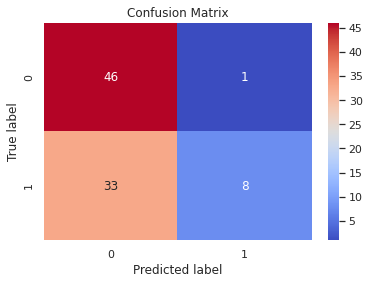

In [ ]:
NB = GaussianNB()
roda_modelo_cv_confusionmatrix(NB, dados_limpos, 5, 10)

###Support Vector Machine (SVM)

In [ ]:
param_grid_SVM = {
    'kernel': ['rbf', 'poly', 'sigmoid']
     }

AUC  0.7564478243021345 - 0.8369628822339321


(0.7564478243021345, 0.8369628822339321)

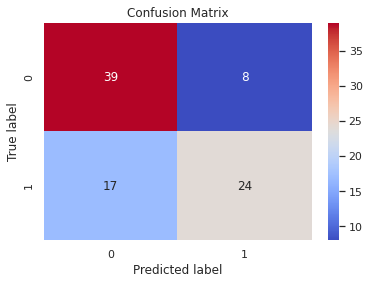

In [ ]:
SVM = SVC()
roda_modelo_GridSearchCV_confusionmatrix(SVM, dados_limpos, 5, 10, param_grid_SVM)

###KNN (K-Nearest Neighbors)

In [ ]:
param_grid_KNN = {
    'n_neighbors': [2, 3, 4, 5, 6, 7],
     'weights': ['uniform', 'distance'],
     'metric': ['euclidean', 'manhattan']
     }

AUC  0.7148834154351396 - 0.8468055353987037


(0.7148834154351396, 0.8468055353987037)

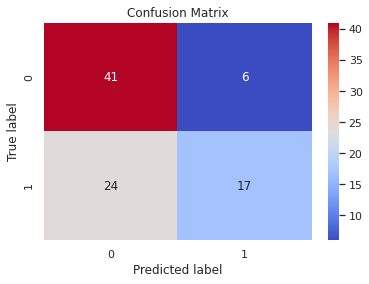

In [ ]:
KNN = KNeighborsClassifier()
roda_modelo_GridSearchCV_confusionmatrix(KNN, dados_limpos, 5, 10, param_grid_KNN)

###Extra Trees Classifier

In [ ]:
param_grid_ETC = {
    "max_depth" : range(3, 6),
    "criterion" : ["gini", "entropy"],
    }  

AUC  0.7724062397372741 - 0.977783862179985


(0.7724062397372741, 0.977783862179985)

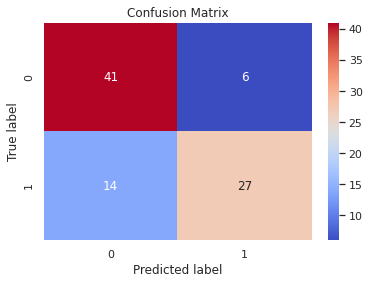

In [ ]:
ETC = ExtraTreesClassifier()
roda_modelo_GridSearchCV_confusionmatrix(ETC, dados_limpos, 5, 10, param_grid_ETC)

##Limpando novamente a base de dados antes da aplicação dos modelos de Machine Learning (parte 2)

Até o momento, rodei os modelos de Machine Learning com a base de dados com todas as 229 colunas. 

Com o objetivo de melhorar a performance dos modelos, será feita a redução do número de colunas através de 2 técnicas.

Na primeira serão excluídas as colunas com alta correlação entre si.

A segunda será uma análise de Feature Importance para identificação e manutenção apenas das variáveis mais importantes para os modelos.

###*Avaliação de Correlação das Variáveis*

Eliminando as colunas que tem alta correlação (> 95%) entre si:

In [ ]:
def remove_corr_var(dados, valor_corte):

    matrix_corr = dados.iloc[:,4:-2].corr().abs()
    matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(np.bool))
    excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > valor_corte)]

    return dados.drop(excluir, axis=1)

dados_limpos_sem_corr = remove_corr_var(dados_limpos, 0.95)

dados_limpos_sem_corr

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_DIFF,FFA_MEDIAN,FFA_DIFF,GGT_MEDIAN,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_DIFF,HEMOGLOBIN_DIFF,INR_MEDIAN,...,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_DIFF,TGO_MEDIAN,TGO_DIFF,TGP_MEDIAN,TGP_DIFF,TTPA_MEDIAN,TTPA_DIFF,UREA_MEDIAN,UREA_DIFF,DIMER_MEDIAN,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.183673,-1.0,-0.868365,-1.0,-0.742004,-1.0,-0.945093,-1.0,-0.891993,-1.0,0.090147,-1.0,-1.0,-0.932246,...,-1.0,0.363636,-1.0,-0.540721,-1.0,-0.518519,-1.0,0.939394,-1.0,0.345679,-1.0,-0.028571,-1.0,-0.997201,-1.0,-0.990854,-1.0,-0.825613,-1.0,-0.836145,-1.0,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,-0.500000,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.912243,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.780261,-1.0,0.144654,-1.0,-1.0,-0.959849,...,-1.0,0.363636,-1.0,-0.399199,-1.0,-0.703704,-1.0,0.939394,-1.0,0.345679,-1.0,0.085714,-1.0,-0.995428,-1.0,-0.986662,-1.0,-0.846633,-1.0,-0.836145,-1.0,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.714286,-0.435897,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,-0.961262,1
3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.972789,-1.0,-1.0,-1.0,0.326531,-1.0,-0.968861,-1.0,-0.194030,-1.0,-0.316589,-1.0,-0.891993,-1.0,-0.203354,-1.0,-1.0,-0.959849,...,-1.0,0.363636,-1.0,-0.564753,-1.0,-0.777778,-1.0,0.939394,-1.0,0.580247,-1.0,0.200000,-1.0,-0.989549,-1.0,-0.956555,-1.0,-0.846633,-1.0,-0.937349,-1.0,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,-0.357143,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.935113,-1.0,-1.0,-1.0,0.357143,-1.0,-0.913659,-1.0,-0.829424,-1.0,-0.938084,-1.0,-0.851024,-1.0,0.358491,-1.0,-1.0,-0.959849,...,-1.0,0.363636,-1.0,-0.457944,-1.0,-0.592593,-1.0,0.939394,-1.0,0.345679,-1.0,0.142857,-1.0,-0.998507,-1.0,-0.991235,-1.0,-0.846633,-1.0,-0.903614,-1.0,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,-0.571429,-0.076923,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,-0.980333,0
5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.891012,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.891993,-1.0,0.291405,-1.0,-1.0,-0.959849,...,-1.0,0.363636,-1.0,-0.292390,-1.0,-0.666667,-1.0,0.939394,-1.0,0.34567

Eliminando as colunas com alta correlação entre si, a base de dados resultante já é bem menor (de 229 para 99 colunas).

###*Filtrando as variáveis mais importantes (Feature Importance)*

Com o objetivo de identificar quais são as variáveis mais importantes para este modelo, farei uma análise de Feature importance com RFECV. 

RFECV = Recursive Feature Elimination and Cross-Validated selection (tradução: Eliminação Recursiva de Variáveis e validação cruzada).


In [ ]:
x_columns = dados_limpos_sem_corr.describe().columns
dados_limpos_sem_corr = dados_limpos_sem_corr.dropna()

y = dados_limpos_sem_corr["ICU"]
X = dados_limpos_sem_corr[x_columns].drop(["ICU"], axis=1)

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [ ]:
print('Número ótimo de variáveis: {}'.format(rfecv.n_features_))

Número ótimo de variáveis: 68


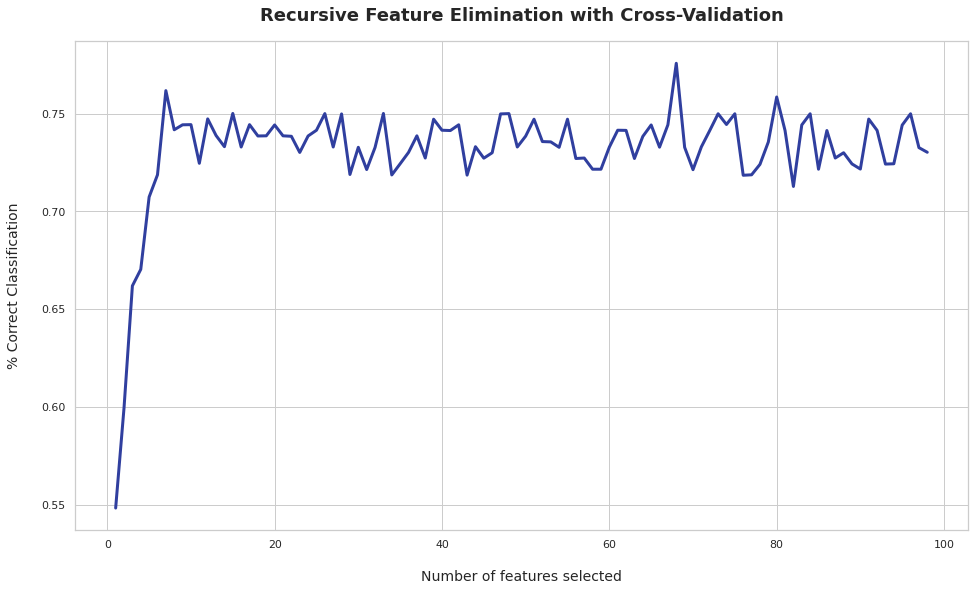

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

O gráfico mostra que a % de classificação correta mais alta ocorreria com 68 variáveis.

Excluindo as variáveis menos importantes:

In [ ]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[13 15 17 19 23 25 27 29 31 33 37 42 44 46 47 49 51 53 55 57 59 61 63 65
 67 69 73 75 79 81]


No gráfico a seguir vemos as 68 variáveis selecionadas pelo RFECV:

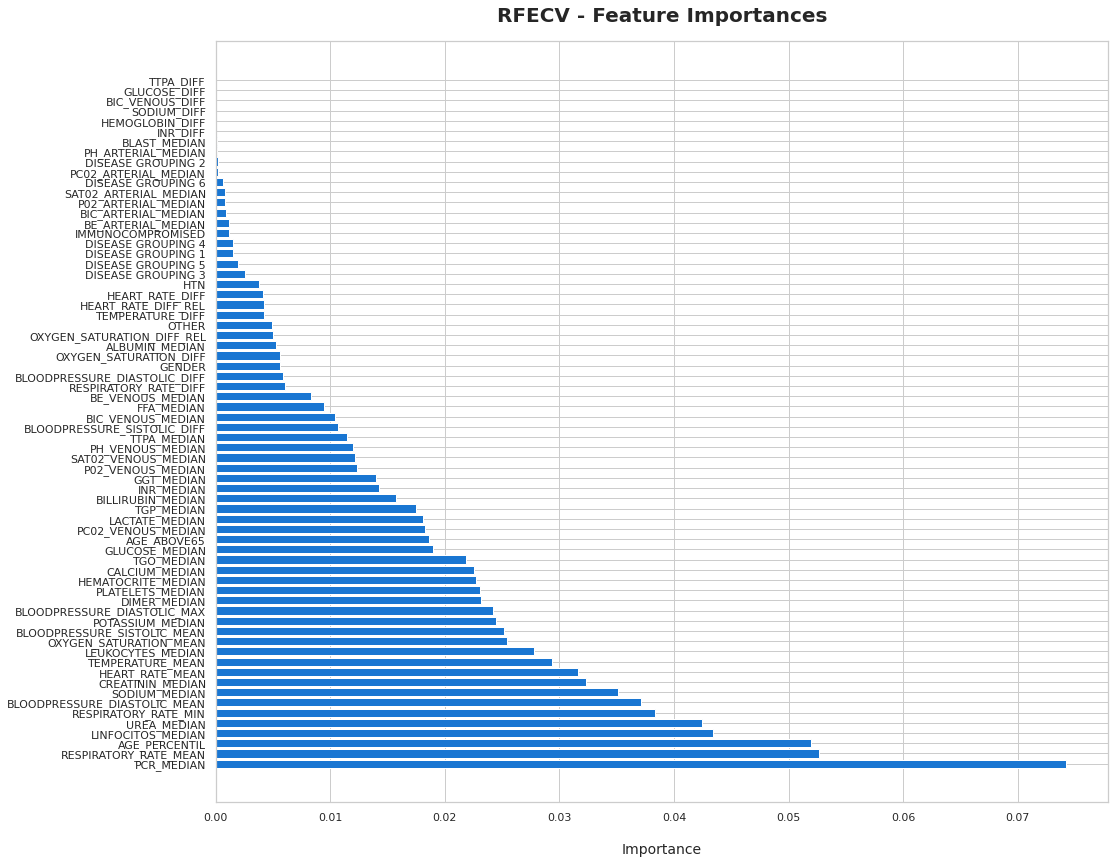

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

Montando um dataset com as 68 variáveis selecionadas:

In [ ]:
dset

,attr,importance
37,PCR_MEDIAN,0.074199
55,RESPIRATORY_RATE_MEAN,0.052674
1,AGE_PERCENTIL,0.051941
32,LINFOCITOS_MEDIAN,0.043397
50,UREA_MEDIAN,0.042466
...,...,...
27,HEMOGLOBIN_DIFF,0.000000
45,SODIUM_DIFF,0.000000
17,BIC_VENOUS_DIFF,0.000000
25,GLUCOSE_DIFF,0.000000


In [ ]:
features_rfecv = dset.attr.values
features_rfecv = list(features_rfecv)
features_rfecv.append('ICU')
dados_limpos2 = dados_limpos_sem_corr[features_rfecv]
dados_limpos2

,PCR_MEDIAN,RESPIRATORY_RATE_MEAN,AGE_PERCENTIL,LINFOCITOS_MEDIAN,UREA_MEDIAN,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MEAN,SODIUM_MEDIAN,CREATININ_MEDIAN,HEART_RATE_MEAN,TEMPERATURE_MEAN,LEUKOCYTES_MEDIAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,POTASSIUM_MEDIAN,BLOODPRESSURE_DIASTOLIC_MAX,DIMER_MEDIAN,PLATELETS_MEDIAN,HEMATOCRITE_MEDIAN,CALCIUM_MEDIAN,TGO_MEDIAN,GLUCOSE_MEDIAN,AGE_ABOVE65,PC02_VENOUS_MEDIAN,LACTATE_MEDIAN,TGP_MEDIAN,BILLIRUBIN_MEDIAN,INR_MEDIAN,GGT_MEDIAN,P02_VENOUS_MEDIAN,SAT02_VENOUS_MEDIAN,PH_VENOUS_MEDIAN,TTPA_MEDIAN,BLOODPRESSURE_SISTOLIC_DIFF,BIC_VENOUS_MEDIAN,FFA_MEDIAN,BE_VENOUS_MEDIAN,RESPIRATORY_RATE_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF,GENDER,OXYGEN_SATURATION_DIFF,ALBUMIN_MEDIAN,OXYGEN_SATURATION_DIFF_REL,OTHER,TEMPERATURE_DIFF,HEART_RATE_DIFF_REL,HEART_RATE_DIFF,HTN,DISEASE GROUPING 3,DISEASE GROUPING 5,DISEASE GROUPING 1,DISEASE GROUPING 4,IMMUNOCOMPROMISED,BE_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEDIAN,P02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEDIAN,DISEASE GROUPING 6,PC02_ARTERIAL_MEDIAN,DISEASE GROUPING 2,PH_ARTERIAL_MEDIAN,BLAST_MEDIAN,INR_DIFF,HEMOGLOBIN_DIFF,SODIUM_DIFF,BIC_VENOUS_DIFF,GLUCOSE_DIFF,TTPA_DIFF,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.875236,-0.593220,5,-0.914938,-0.836145,-0.500000,0.086420,-0.028571,-0.868365,-0.283019,-0.285714,-0.835844,0.736842,-0.230769,-0.518519,-0.247863,-0.994912,-0.540721,0.090147,0.183673,-0.997201,-0.891993,1,-0.754601,1.000000,-0.990854,-0.938950,-0.932246,-0.945093,-0.704142,0.345679,0.363636,-0.825613,-1.000000,-0.317073,-0.742004,-1.000000,-1.000000,-1.000000,0,-1.000000,0.605263,-1.000000,1.0,-1.000000,-1.000000,-1.000000,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,-0.317073,-0.170732,0.939394,1.0,-0.77931,0.0,0.234043,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
2,-0.939887,-0.645951,0,-0.908714,-0.836145,-0.714286,-0.489712,0.085714,-0.912243,-0.048218,0.357143,-0.382773,0.935673,-0.685470,-0.703704,-0.435897,-0.978029,-0.399199,0.144654,0.357143,-0.995428,-0.780261,0,-0.754601,1.000000,-0.986662,-0.938950,-0.959849,-0.958528,-0.704142,0.345679,0.363636,-0.846633,-0.533742,-0.317073,-0.742004,-1.000000,-0.764706,-0.547826,0,-0.959596,0.605263,-0.961262,1.0,-1.000000,-0.747001,-0.603053,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-0.317073,-0.170732,0.939394,0.0,-0.77931,0.0,0.234043,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
3,-0.503592,-0.457627,3,-0.836100,-0.937349,-0.357143,0.012346,0.200000,-0.968861,-0.528302,-0.285714,-0.729239,0.684211,-0.369231,-0.777778,-0.299145,-0.978029,-0.564753,-0.203354,0.326531,-0.989549,-0.891993,0,-0.779141,-0.828421,-0.956555,-0.972789,-0.959849,-0.316589,-0.633136,0.580247,0.363636,-0.846633,-1.000000,-0.317073,-0.194030,-1.000000,-1.000000,-1.000000,1,-1.000000,-0.263158,-1.000000,1.0,-1.000000,-1.000000,-1.000000,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-0.317073,-0.170732,0.939394,0.0,-0.77931,0.0,0.234043,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
4,-0.990926,-0.593220,0,-0.641079,-0.903614,-0.571429,0.333333,0.142857,-0.913659,0.160377,0.285714,-0.702202,0.868421,-0.153846,-0.592593,-0.076923,-1.000000,-0.457944,0.358491,0.357143,-0.998507,-0.851024,0,-0.754601,1.000000,-0.991235,-0.935113,-0.959849,-0.938084,-0.704142,0.345679,0.363636,-0.846633,-0.877301,-0.317073,-0.829424,-1.000000,-0.882353,-1.000000,0,-0.979798,0.605263,-0.980333,1.0,-0.952381,-0.956805,-0.923664,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-0.317073,-0.170732,0.939394,0.0,-0.77931,0.0,0.234043,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
5,-0.997732,-0.525424,0,-0.340249,-0.884337,-0.428571,-0.037037,0.085714,-0.891012,-0.537736,-0.196429,-0.706450,0.815789,-0.538462,-0.666667,-0.247863,-1.000000,-0.292390,0.291405,0.357143,-0.997947,-0.891993,0,-0.754601,1.000000,-0.988948,-0.938950,-0.959849,-0.958528,-0.704142,0.345679,0.363636,-0.846633,-0.754601,-0.317073,-0.742004,-1.000000,-1.000000,-0.826087,0,-0.979798,0.605263,-0.980129,1.0,-0.976190,-0.986481,-0.984733,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-0.317073,-0.170732,0.939394,0.0,-0.77931,0.0,0.234043,-1.0

##Rodando modelos de Machine Learning (parte 2)

Comparação de diferentes modelos de Machine Learning utilizando a base dados_limpos2, com as 68 variáveis selecionadas pelo RFECV:

#####Logistic Regression

AUC médio teste 0.7317277914614121 - AUC médio treino 0.8393960975071824


(0.7317277914614121, 0.8393960975071824)

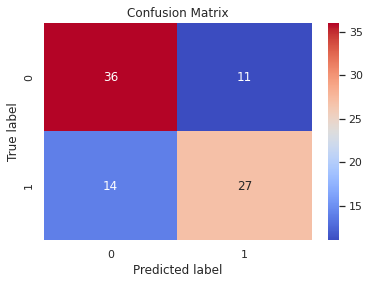

In [ ]:
LogReg = LogisticRegression(max_iter=10000)
roda_modelo_cv_confusionmatrix(LogReg, dados_limpos2, 5, 10)

###Decision Tree

AUC  0.6419171387520527 - 0.7635862848925722


(0.6419171387520527, 0.7635862848925722)

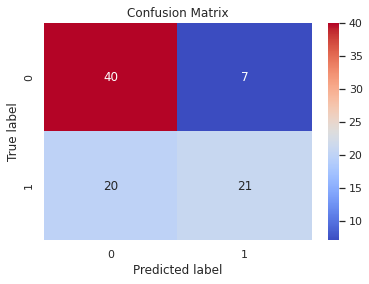

In [ ]:
DT = DecisionTreeClassifier()
roda_modelo_GridSearchCV_confusionmatrix(DT, dados_limpos2, 5, 10, param_grid_DT)

###Random Forest

AUC  0.7895149835796387 - 1.0


(0.7895149835796387, 1.0)

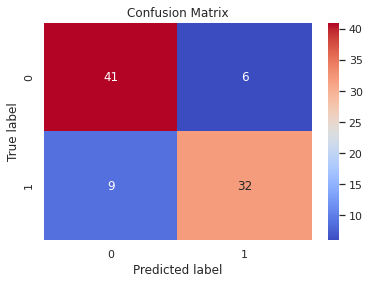

In [ ]:
RFC = RandomForestClassifier()
roda_modelo_GridSearchCV_confusionmatrix(RFC, dados_limpos2, 5, 10, param_grid_RF)

###Naive Bayes

AUC médio teste 0.6762753899835796 - AUC médio treino 0.7804206531910993


(0.6762753899835796, 0.7804206531910993)

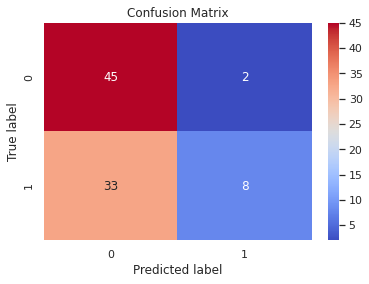

In [ ]:
NB = GaussianNB()
roda_modelo_cv_confusionmatrix(NB, dados_limpos2, 5, 10)

###Support Vector Machine (SVM)

AUC  0.738758620689655 - 0.8030885027941236


(0.738758620689655, 0.8030885027941236)

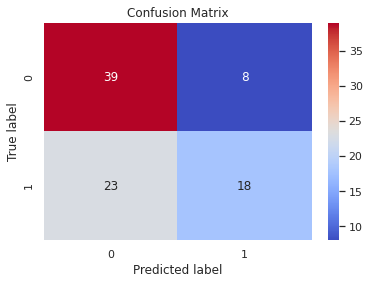

In [ ]:
SVM = SVC()
roda_modelo_GridSearchCV_confusionmatrix(SVM, dados_limpos2, 5, 10, param_grid_SVM)

###KNN (K-Nearest Neighbors)

AUC  0.7274451559934317 - 0.8468103185747285


(0.7274451559934317, 0.8468103185747285)

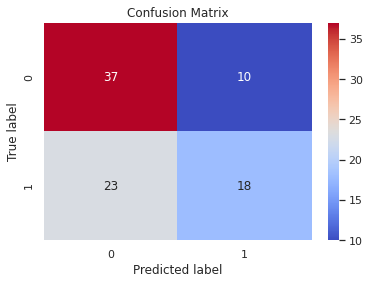

In [ ]:
KNN = KNeighborsClassifier()
roda_modelo_GridSearchCV_confusionmatrix(KNN, dados_limpos2, 5, 10, param_grid_KNN)

###Extra Trees Classifier

AUC  0.7569160919540231 - 0.9571506239957027


(0.7569160919540231, 0.9571506239957027)

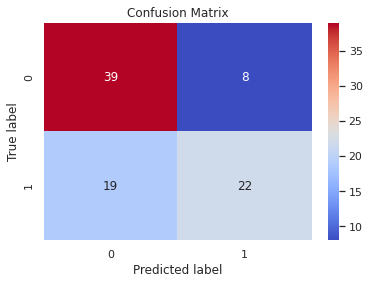

In [ ]:
ETC = ExtraTreesClassifier()
roda_modelo_GridSearchCV_confusionmatrix(ETC, dados_limpos2, 5, 10, param_grid_ETC)

##Trabalhando novamente a base de dados antes da aplicação do modelo de Machine Learning (parte 3)

Como a base de dados gerada após RFECV ainda é grande (68 variáveis) e o desempenho de alguns modelos não foi melhor do que com a base mais completa (229 colunas), selecionarei as 20 principais variáveis através do Feature Importances do Extra Trees Classifier, gerando um novo dataframe (dados_limpos3):

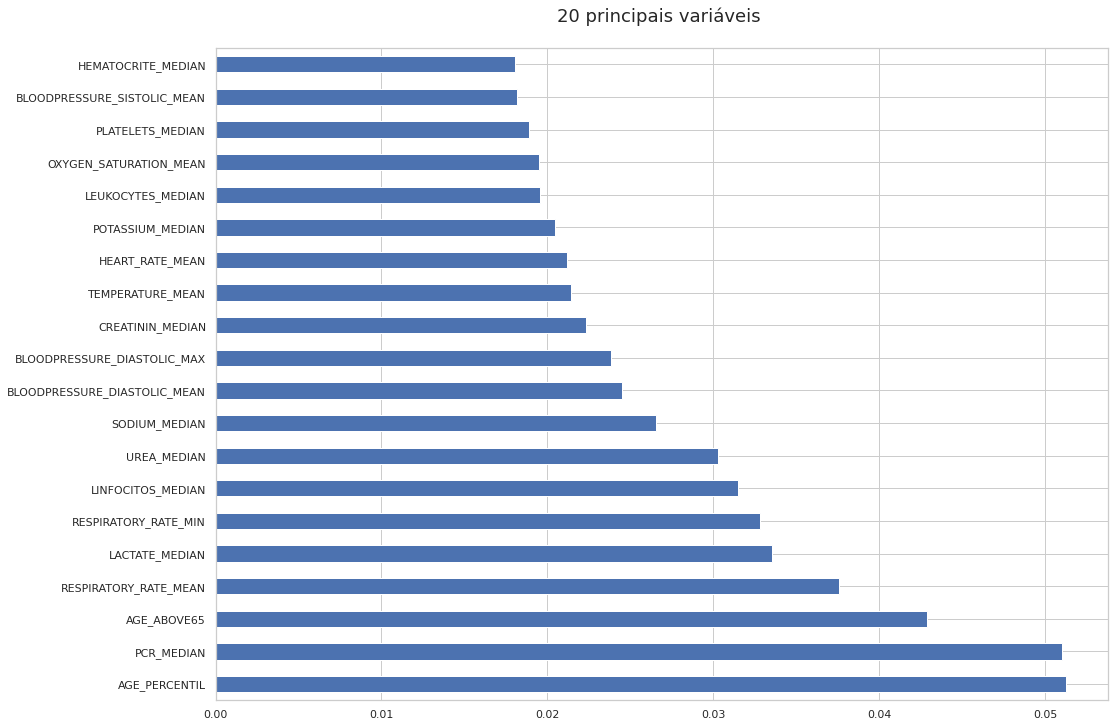

In [ ]:
y = dados_limpos2["ICU"]
X = dados_limpos2.drop(["ICU"], axis=1) 

model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)

plt.figure(figsize=(16, 12))
plt.title("20 principais variáveis \n", fontsize=18)
feat_importances.nlargest(20).plot(kind='barh') 
plt.show()

Interessante confirmar que LACTATE é uma das variáveis mais relevantes para o modelo, fato que já havia sido observado durante a análise dos resultados dos exames de sangue.

In [ ]:
colunas_novas = feat_importances.nlargest(20)
colunas_novas

AGE_PERCENTIL                   0.051252
PCR_MEDIAN                      0.051017
AGE_ABOVE65                     0.042895
RESPIRATORY_RATE_MEAN           0.037582
LACTATE_MEDIAN                  0.033541
RESPIRATORY_RATE_MIN            0.032788
LINFOCITOS_MEDIAN               0.031519
UREA_MEDIAN                     0.030296
SODIUM_MEDIAN                   0.026547
BLOODPRESSURE_DIASTOLIC_MEAN    0.024498
BLOODPRESSURE_DIASTOLIC_MAX     0.023816
CREATININ_MEDIAN                0.022332
TEMPERATURE_MEAN                0.021412
HEART_RATE_MEAN                 0.021210
POTASSIUM_MEDIAN                0.020475
LEUKOCYTES_MEDIAN               0.019549
OXYGEN_SATURATION_MEAN          0.019492
PLATELETS_MEDIAN                0.018919
BLOODPRESSURE_SISTOLIC_MEAN     0.018194
HEMATOCRITE_MEDIAN              0.018027
dtype: float64

In [ ]:
df_colunas_novas = pd.DataFrame({'colunas':colunas_novas.index, 'valores':colunas_novas.values})
df_colunas_novas

,colunas,valores
0,AGE_PERCENTIL,0.051252
1,PCR_MEDIAN,0.051017
2,AGE_ABOVE65,0.042895
3,RESPIRATORY_RATE_MEAN,0.037582
4,LACTATE_MEDIAN,0.033541
5,RESPIRATORY_RATE_MIN,0.032788
6,LINFOCITOS_MEDIAN,0.031519
7,UREA_MEDIAN,0.030296
8,SODIUM_MEDIAN,0.026547
9,BLOODPRESSURE_DIASTOLIC_MEAN,0.024498


In [ ]:
dados_limpos3 = dados_limpos2[colunas_novas.index.tolist() + ['ICU']].copy()
dados_limpos3 

,AGE_PERCENTIL,PCR_MEDIAN,AGE_ABOVE65,RESPIRATORY_RATE_MEAN,LACTATE_MEDIAN,RESPIRATORY_RATE_MIN,LINFOCITOS_MEDIAN,UREA_MEDIAN,SODIUM_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,CREATININ_MEDIAN,TEMPERATURE_MEAN,HEART_RATE_MEAN,POTASSIUM_MEDIAN,LEUKOCYTES_MEDIAN,OXYGEN_SATURATION_MEAN,PLATELETS_MEDIAN,BLOODPRESSURE_SISTOLIC_MEAN,HEMATOCRITE_MEDIAN,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
0,5,-0.875236,1,-0.593220,1.000000,-0.500000,-0.914938,-0.836145,-0.028571,0.086420,-0.247863,-0.868365,-0.285714,-0.283019,-0.518519,-0.835844,0.736842,-0.540721,-0.230769,0.090147,1
2,0,-0.939887,0,-0.645951,1.000000,-0.714286,-0.908714,-0.836145,0.085714,-0.489712,-0.435897,-0.912243,0.357143,-0.048218,-0.703704,-0.382773,0.935673,-0.399199,-0.685470,0.144654,1
3,3,-0.503592,0,-0.457627,-0.828421,-0.357143,-0.836100,-0.937349,0.200000,0.012346,-0.299145,-0.968861,-0.285714,-0.528302,-0.777778,-0.729239,0.684211,-0.564753,-0.369231,-0.203354,0
4,0,-0.990926,0,-0.593220,1.000000,-0.571429,-0.641079,-0.903614,0.142857,0.333333,-0.076923,-0.913659,0.285714,0.160377,-0.592593,-0.702202,0.868421,-0.457944,-0.153846,0.358491,0
5,0,-0.997732,0,-0.525424,1.000000,-0.428571,-0.340249,-0.884337,0.085714,-0.037037,-0.247863,-0.891012,-0.196429,-0.537736,-0.666667,-0.706450,0.815789,-0.292390,-0.538462,0.291405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,3,-0.565974,0,-0.457627,1.000000,-0.357143,-0.879668,-0.860241,-0.428571,-0.160494,-0.418803,-0.937721,0.142857,0.339623,-0.629630,-0.704519,0.736842,-0.895861,-0.692308,-0.253669,1
381,9,-0.993195,1,-0.457627,1.000000,-0.357143,-0.921162,-0.855422,-0.314286,-0.407407,-0.589744,-0.886766,-0.059524,-0.283019,-0.518519,-0.794129,0.526316,-0.516689,-0.692308,-0.241090,0
382,4,-0.034405,0,-0.457627,1.000000,-0.357143,-0.838174,-0.787952,-0.085714,0.012346,-0.299145,-0.905166,-0.071429,-0.320755,-0.407407,-0.718038,0.894737,-0.658211,-0.384615,0.064990,1


##Rodando modelos de Machine Learning (parte 3)

Agora vou rodar os modelos com este novo dataframe com as 20 principais variáveis:

#####Logistic Regression

AUC médio teste 0.7469174876847291 - AUC médio treino 0.8044785102589911


(0.7469174876847291, 0.8044785102589911)

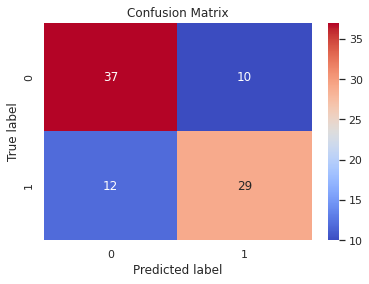

In [ ]:
LogReg = LogisticRegression(max_iter=10000)
roda_modelo_cv_confusionmatrix(LogReg, dados_limpos3, 5, 10)

#####Decision Tree

AUC  0.6622717980295566 - 0.8308322024808658


(0.6622717980295566, 0.8308322024808658)

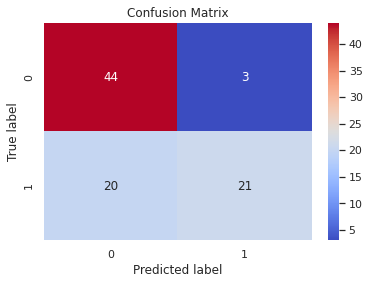

In [ ]:
DT = DecisionTreeClassifier()
roda_modelo_GridSearchCV_confusionmatrix(DT, dados_limpos3, 5, 10, param_grid_DT)

#####Random Forest

AUC  0.7734141625615762 - 1.0


(0.7734141625615762, 1.0)

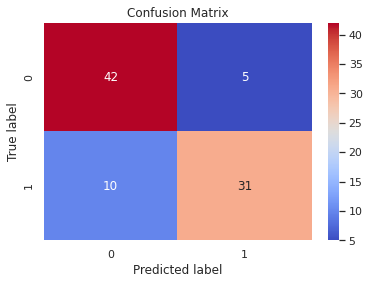

In [ ]:
RFC = RandomForestClassifier()
roda_modelo_GridSearchCV_confusionmatrix(RFC, dados_limpos3, 5, 10, param_grid_RF)

#####Naive Bayes

AUC médio teste 0.7625716748768473 - AUC médio treino 0.8088691581482802


(0.7625716748768473, 0.8088691581482802)

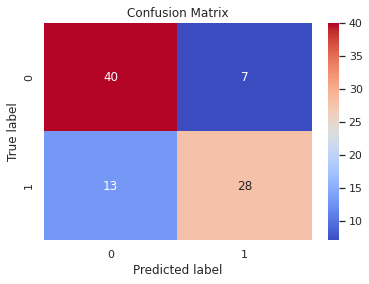

In [ ]:
NB = GaussianNB()
roda_modelo_cv_confusionmatrix(NB, dados_limpos3, 5, 10)

###Support Vector Machine (SVM)

AUC  0.7254226600985223 - 0.7635469303610793


(0.7254226600985223, 0.7635469303610793)

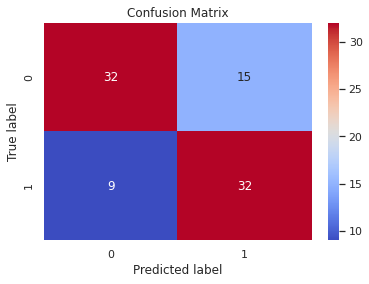

In [ ]:
SVM = SVC()
roda_modelo_GridSearchCV_confusionmatrix(SVM, dados_limpos3, 5, 10, param_grid_SVM)

###KNN (K-Nearest Neighbors)

AUC  0.6960947249589491 - 1.0


(0.6960947249589491, 1.0)

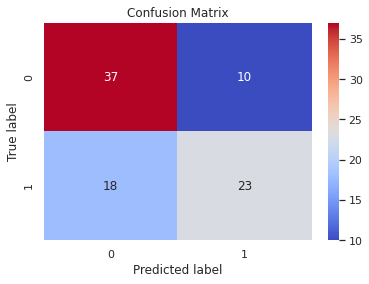

In [ ]:
KNN = KNeighborsClassifier()
roda_modelo_GridSearchCV_confusionmatrix(KNN, dados_limpos3, 5, 10, param_grid_KNN)

###Extra Trees Classifier

AUC  0.7606038177339901 - 0.9520178692002205


(0.7606038177339901, 0.9520178692002205)

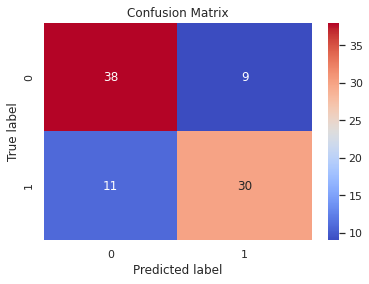

In [ ]:
ETC = ExtraTreesClassifier()
roda_modelo_GridSearchCV_confusionmatrix(ETC, dados_limpos3, 5, 10, param_grid_ETC)

# ***RESUMO***

**Resumo das observações das análises das variáveis demográficas:**

- A análise exploratória dos dados foi feita com a base de dados completa (385 pacientes). Deste total aproximadamente 50% dos pacientes foram para a UTI e 50% não.

- A maior parte (63%) dos pacientes é do gênero 0. A maior parte (56%) dos pacientes do gênero 0 utilizou a UTI, enquanto que a maior parte (58%) dos pacientes do gênero 1 não utilizaram a UTI.

- A maior parte dos pacientes (205) tinha idade abaixo de 65 anos e 180 com idade acima de 65 anos.

- A mediana de idade dos pacientes do gênero 1 é maior (60 anos) comparada aos pacientes do gênero 0 (50 anos).

- Para os pacientes que foram para a UTI, a mediana de idade do gênero 1 (80 anos) é maior que dos pacientes do gênero 0 (60 anos).

- Para os pacientes que não foram para a UTI, a mediana de idade é a mesma para os 2 gêneros (40 anos).

**Resumo das observações das análises das doenças anteriores:**

- A análise foi feita somente com os pacientes que foram para a UTI. Considerando esta base de dados, a doença anterior mais frequente é a HTN (pressão alta).

- Em seguida, 3 outros grupos de doenças aparecem em quantidade similar: Disease Group 5, Disease Group 3 e Immunocompomised.

**Resumo das observações das análises dos resultados dos exames de sangue:**

- o maior destaque é "LACTATE" porque a média dos resultados dos pacientes que foram internados na UTI (-1) é o oposto dos pacientes que não foram para a UTI (+1), indicando que esta é uma variável de grande relevância para o modelo. Este fato foi comprovado nas análises de fature importance realizadas como preparação antes da aplicação dos modelos de Machine Learning.

- Na maioria dos parâmetros medidos nos exames de sangue, os resultados dos pacientes que foram para a UTI apresentaram distribuição muito mais longa do que para os pacientes que não foram para a UTI. Exemplos: BILLIRUBIN, BE_ARTERIAL, TTPA, TGP, UREA, BIC_ARTERIAL entre outros.

**Resumo das observações das análises dos sinais vitais:**

- O parâmetro que mais chama a atenção é "RESPIRATORY_RATE", devido à distribuição mais alongada para pacientes que foram para a UTI, enquanto que os que não foram apresentaram medidas muito mais próximas da mediana.

- Também há diferença nos 2 parâmetros relacionados a "BLOODPRESSURE".

**Resumo das observações dos resultados dos modelos de Machine Learning:**

Na matriz de confusão, um ponto de preocupação são os Falsos Negativos. São os casos em que na realidade o paciente foi internado na UTI (True Label = 1), mas que o modelo classificou incorretamente (Predicted Label = 0). Quanto maior o número destes casos, pior o desempenho do modelo.

Comparação das diferentes bases de dados e modelos de Machine Learning:

- **Logistic Regression**: quanto menor a base de dados, melhor o AUC e classificação na matriz de confusão. 

- **Decision Tree**: Melhor desempenho com a menor base de dados. Porém pior AUC e matriz de confusão comparado ao modelo Logistic Regression.

- **Random Forest**: maior AUC e melhor matriz de confusão foram obtidos com a base de dados com 68 variáveis.

- **Naive Bayes**: desempenho da matriz de confusão melhorou bastante com a base de dados menor (20 variáveis). Porém AUC inferior ao obtido com o Random Forest.

- **SVM**: melhor AUC com a base de dados maior (230 colunas). AUC e matriz de confusão inferiores ao Random Forest.

- **KNN**: maior AUC e melhor matriz de confusão foram obtidos com a base de dados com 68 variáveis. Porém ambos foram inferiores ao Random Forest.

- **Extra Trees**: melhor AUC com a base de dados maior (230 colunas). AUC e matriz de confusão inferiores ao Random Forest.


# ***CONCLUSÕES***

Não há uma receita de sucesso única para todos os modelos de Machine Learning. 

Ao contrário do que se esperava, nem todos os modelos tiveram melhor desempenho ao trabalhar com as bases de dados menores (com a seleção das principais variáveis). 

O modelo com melhor desempenho (maior AUC e melhor matriz de confusão) foi o Random Forest Classifier (resultado abaixo):

AUC  0.7895149835796387 - 1.0


(0.7895149835796387, 1.0)

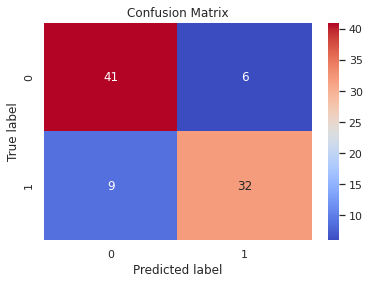

In [ ]:
roda_modelo_GridSearchCV_confusionmatrix(RFC, dados_limpos2, 5, 10, param_grid_RF)

# ***PRÓXIMOS PASSOS***

Estudar mais sobre outros modelos de Machine Learning, bem como aprofundar entendimento sobre técnicas de ajuste de modelos com hiperparâmetros para buscar outras alternativas que poderiam trazer melhores resultados para esta base de dados.